# AutoML

In [23]:
from pprint import pprint

from autosklearn.regression import AutoSklearnRegressor

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

In [8]:
def NMAE(true, pred):
    mae = np.mean(np.abs(true-pred))
    score = mae / np.mean(np.abs(true))
    return score

In [9]:
raw_data = pd.read_csv('data/train_data_hs.csv',)

In [10]:
train_data = raw_data[~(raw_data.id%10).isin([3,5,7])]
vali_data = raw_data[(raw_data.id%10).isin([3,5,7])]

In [11]:
y_col = ['Target']

In [12]:
x_col = list(raw_data.columns)
x_col.remove('id')
x_col.remove('Target')

In [13]:
train_X = train_data[x_col]

In [14]:
train_y = train_data[y_col]

In [15]:
model = AutoSklearnRegressor(
    time_left_for_this_task=120,
    per_run_time_limit=30,)

In [16]:
model.fit(train_X, train_y, dataset_name='diabetes')

AutoSklearnRegressor(per_run_time_limit=30, time_left_for_this_task=120)

In [24]:
pprint(model.show_models(), indent=4)

('[(0.560000, '
 "SimpleRegressionPipeline({'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': "
 "'one_hot_encoding', "
 "'data_preprocessing:categorical_transformer:category_coalescence:__choice__': "
 "'no_coalescense', "
 "'data_preprocessing:numerical_transformer:imputation:strategy': 'mean', "
 "'data_preprocessing:numerical_transformer:rescaling:__choice__': "
 "'quantile_transformer', 'feature_preprocessor:__choice__': "
 "'feature_agglomeration', 'regressor:__choice__': 'gaussian_process', "
 "'data_preprocessing:numerical_transformer:rescaling:quantile_transformer:n_quantiles': "
 '268, '
 "'data_preprocessing:numerical_transformer:rescaling:quantile_transformer:output_distribution': "
 "'uniform', 'feature_preprocessor:feature_agglomeration:affinity': "
 "'euclidean', 'feature_preprocessor:feature_agglomeration:linkage': "
 "'average', 'feature_preprocessor:feature_agglomeration:n_clusters': 107, "
 "'feature_preprocessor:feature_agglomeration:pool

In [19]:
test_data = vali_data.copy()

In [20]:
test_data['pred'] = model.predict(vali_data[x_col])

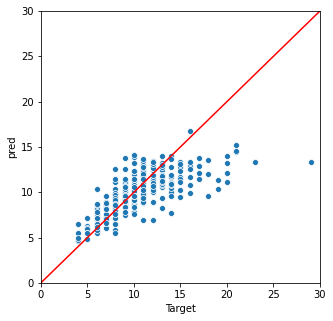

In [29]:
plt.figure(figsize = (5,5))
g1 = sns.scatterplot(data=test_data, x='Target', y='pred',)
g1.set_xlim([0, 30])
g1.set_ylim([0, 30])
sns.lineplot(x=[0, 30], y=[0, 30], color='red')

In [22]:
round(NMAE(test_data.Target, test_data.pred)*100, 3)

15.766

|종류|NMAE|
|---|---|
|AutoML|15.766|